Linkedin App Review using Sentiment Analysis 

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv("linkedin-reviews.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [10]:
data.head(3)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1


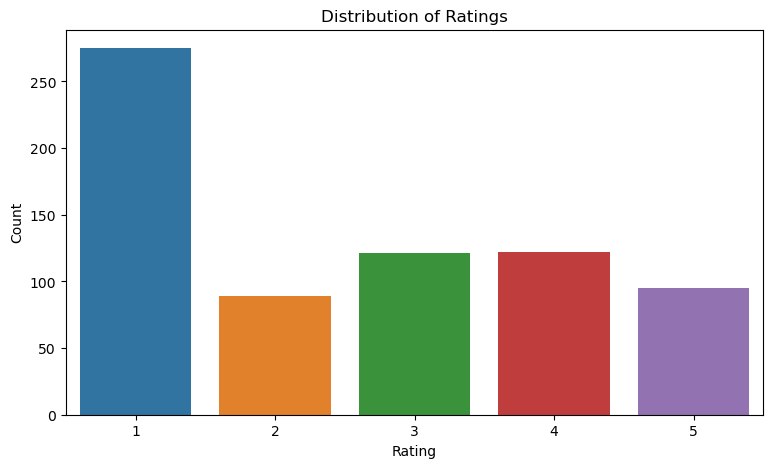

In [19]:
plt.figure(figsize=(9,5))
sns.countplot(data=data,x="Rating")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [22]:
#Clacultae length of each review
data["Review Length"]=data["Review"].apply(len)

In [21]:
data["Review Length"]

0       80
1       23
2       61
3       90
4      133
      ... 
697     53
698     72
699     81
700    123
701     80
Name: Review Length, Length: 702, dtype: int64

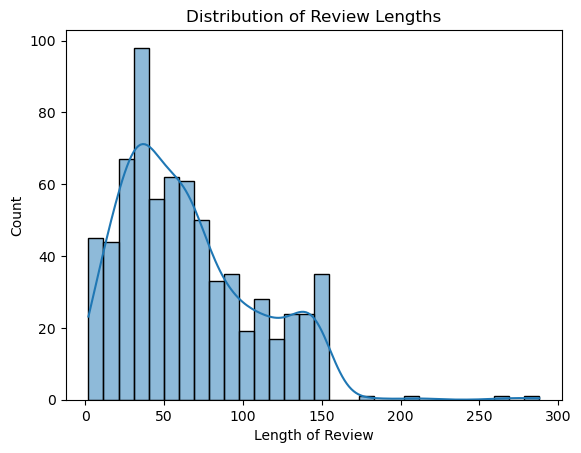

In [24]:
sns.histplot(data["Review Length"],bins=30,kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

In [25]:
pip install textblob

     -------------------------------------- 626.3/626.3 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from textblob import TextBlob as tb

In [109]:
def sentiment_analysis(review):
    sentiment=tb(review).sentiment
    if sentiment.polarity> 0.1:
        return 'Positive'
    elif sentiment.polarity<-0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [110]:
data["Sentiment"]=data["Review"].apply(sentiment_analysis)

In [111]:
data.tail()

,Review,Rating,Review Length,Sentiment
697,"Can't trust, Going to uninstall just for that ...",1,53,Neutral
698,It really gets me linked in with my friends. H...,5,72,Positive
699,It lacks most of what makes the other social n...,4,81,Positive
700,Really disappointed in the new version. Seems ...,2,123,Neutral
701,One of the best looking and well designed apps...,5,80,Positive


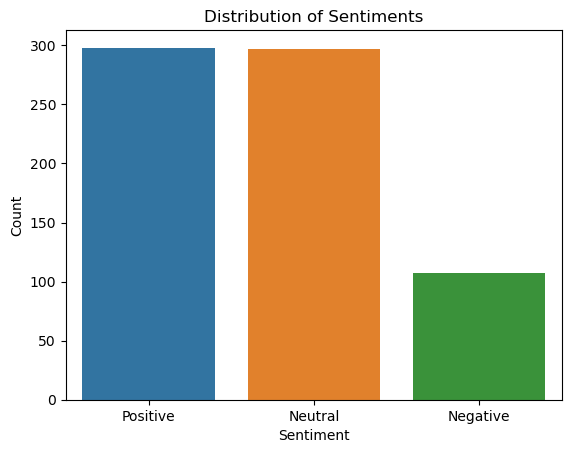

In [112]:
sentiment_dist=data["Sentiment"].value_counts()
sns.barplot(x=sentiment_dist.index,y=sentiment_dist)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

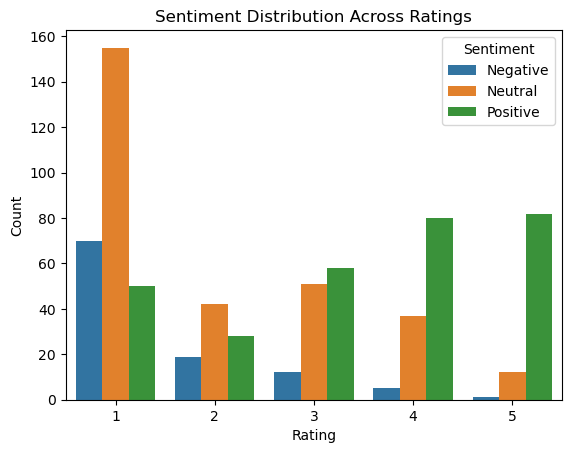

In [113]:
sns.countplot(data=data,x="Rating",hue="Sentiment")
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [114]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


We can see although the app has low ratings, still the reviewers don’t use many negative words in the reviews for the app.

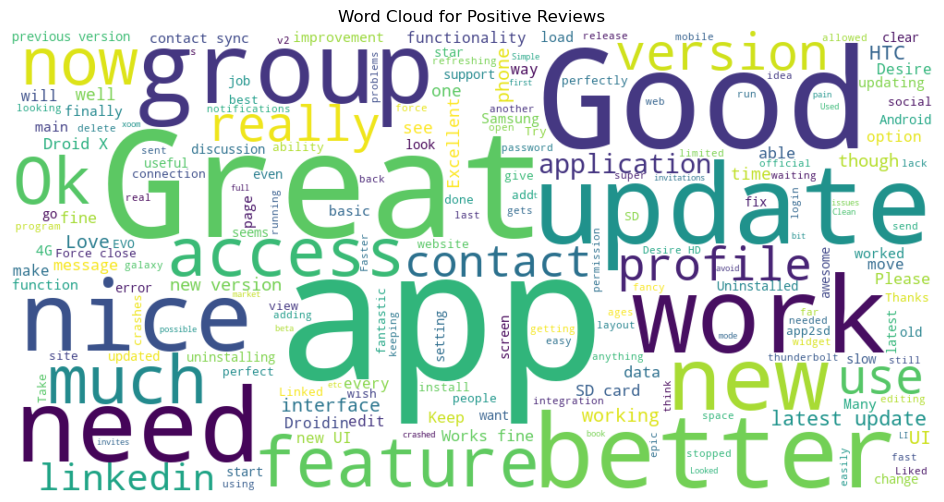

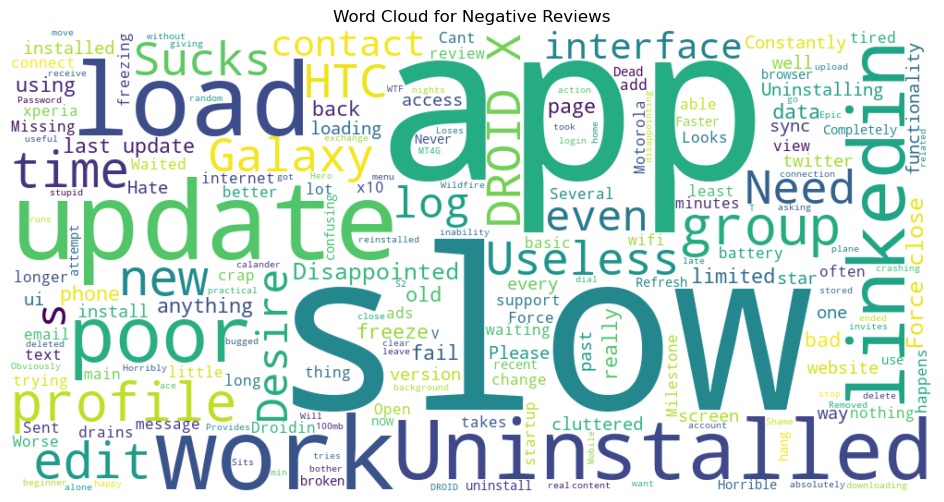

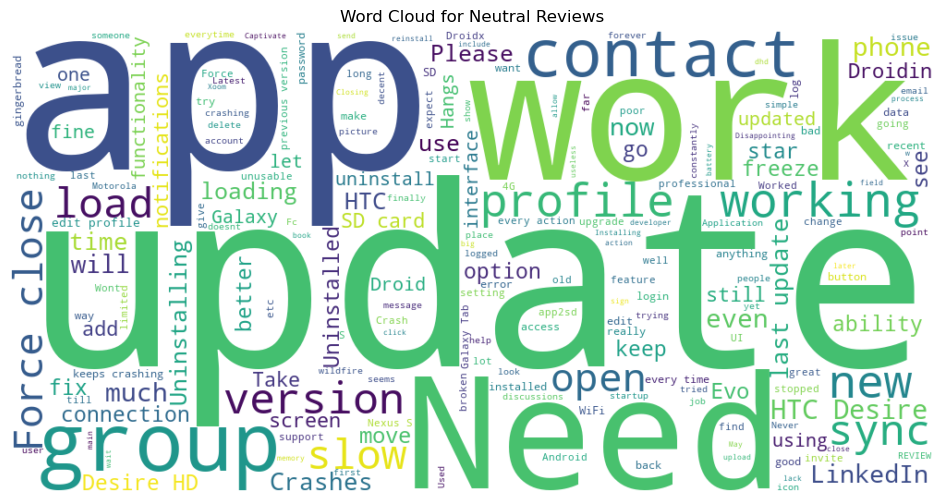

In [115]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(sentiment):
    text = ' '.join(review for review in data[data['Sentiment'] == sentiment]['Review'])
    word_cloud = WordCloud(width=1000, height=500, background_color="white").generate(text)
    plt.figure(figsize=(12, 6))  # Corrected the typo in figsize
    plt.imshow(word_cloud, interpolation='bilinear')  # Corrected the variable name
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Iterating over sentiments should be outside the function
for sentiment in ["Positive", "Negative", "Neutral"]:
    generate_word_cloud(sentiment)
